# Perbandingan Efektivitas Algoritma XGBoost dan MLP pada Klasifikasi Penyakit Diabetes

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [36]:
# Load dataset
df = pd.read_csv("../data/Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


class nya itu ada Diabetic, Non-Diabetic, and Predicted-
Diabetic

### Ringkasan Statistik Awal

In [37]:
# Informasi umum dataset
df.info()

# Statistik deskriptif
df.describe(include='all')
# Tujuan: melihat tipe data, missing values, distribusi nilai minimum, maksimum, rata-rata, dll.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840
mean,340.500000,2.705514e+05,NaN,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,NaN
std,240.397673,3.380758e+06,NaN,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,NaN
min,1.000000,1.230000e+02,NaN,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,125.750000,2.406375e+04,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,300.500000,3.439550e+04,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,550.250000,4.538425e+04,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


In [38]:
# Melihat nama kolom untuk identifikasi kolom label
print(df.columns)


Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


## Pemahaman Dataset 
Menggunakan : 
1. Distribusi Fitur Numerik
2. Kolerasi Fitur Numerik

### 1. Distribusi Fitur Numerik

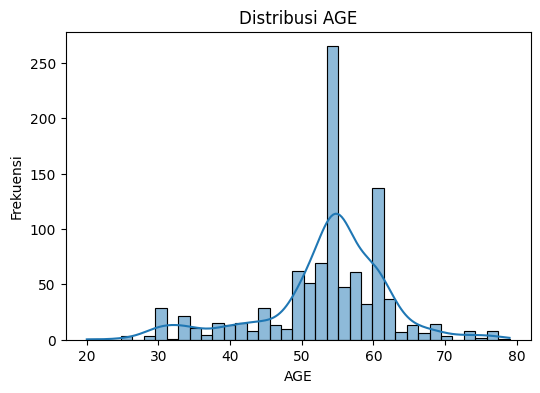

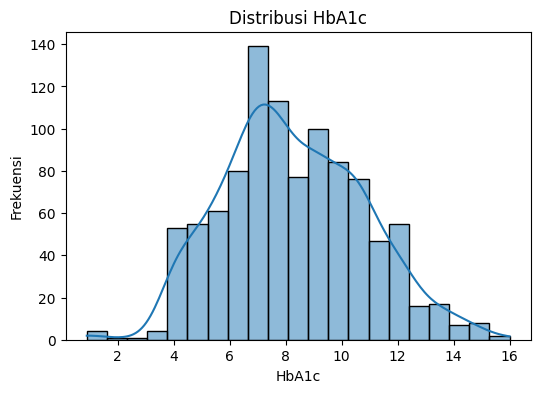

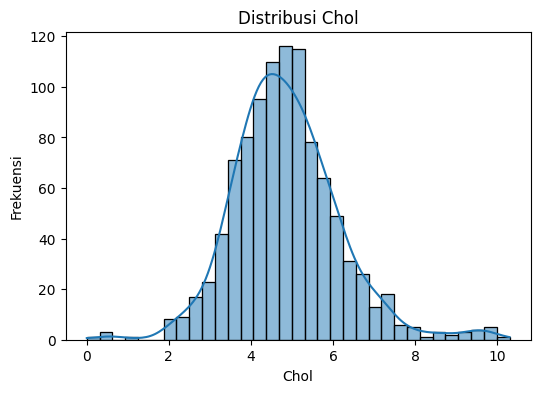

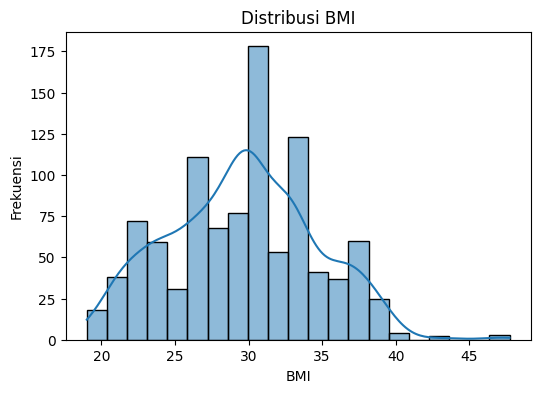

Jumlah data: 1000
Jumlah fitur: 14
Kolom yang memiliki missing values: Series([], dtype: int64)


In [39]:
# Contoh: distribusi fitur penting
features = ['AGE', 'HbA1c', 'Chol', 'BMI']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
# Tujuan: Memahami distribusi fitur penting dalam dataset. Apakah ada outlier atau distribusi yang tidak normal?
# Mengetahui apakah fitur berdistribusi normal, skewed, atau memiliki outlier.

print("Jumlah data:", df.shape[0])
print("Jumlah fitur:", df.shape[1])
print("Kolom yang memiliki missing values:", df.isnull().sum()[df.isnull().sum() > 0])
# Tujuan: Memeriksa apakah ada missing values dalam dataset. Jika ada, perlu dilakukan penanganan missing values.   

### 2. Kolerasi Fitur Numerik
- +1: korelasi sempurna positif (jika satu naik, yang lain juga naik),
- 0: tidak ada korelasi,
- -1: korelasi sempurna negatif (jika satu naik, yang lain turun).
Penjelasan warna :
- Merah terang = korelasi positif tinggi
- Biru gelap = korelasi negatif
- Putih/pucat = korelasi rendah atau hampir nol

Tujuan Membuang variabel yang tidak berkolerasi 
pada tabel : Variabel seperti ID, No_Pation, dan Gender tidak memiliki korelasi bermakna karena bukan variabel medis atau fisiologis.

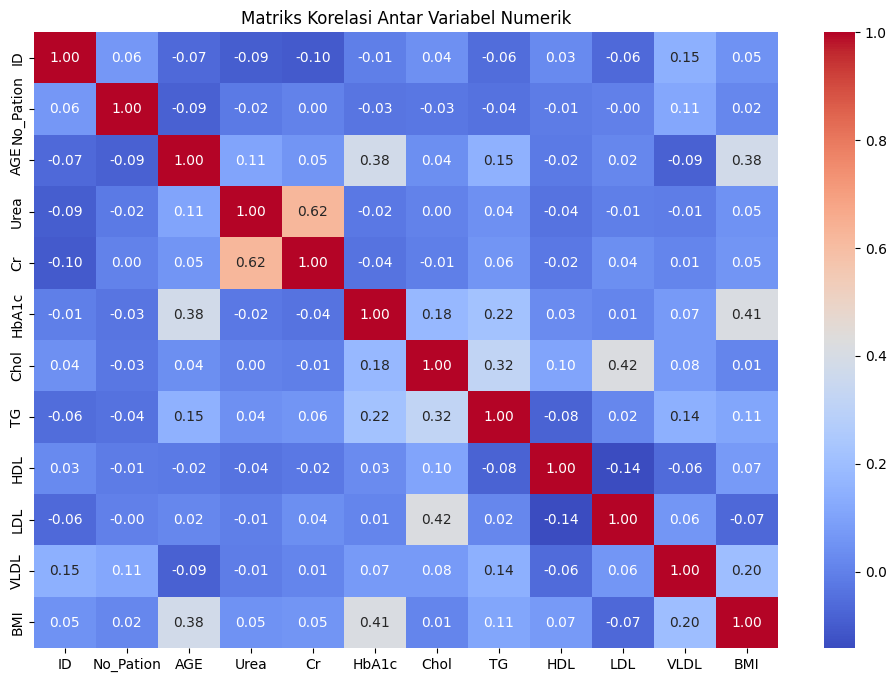

In [40]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()
# 📌 Tujuan: Mengetahui fitur-fitur yang sangat berkorelasi (positif atau negatif). Bisa jadi petunjuk untuk feature selection atau multikolinearitas.

### Tampilkan Kolerasi dalam bentuk angka

In [41]:
# Salin dataframe dan encode kolom CLASS
df_corr = df.copy()
df_corr['CLASS'] = df_corr['CLASS'].map({'N': 0, 'P': 1})

# Drop kolom non-numerik lainnya (misalnya: Gender)
df_corr = df_corr.drop(columns=['Gender'])  # bisa ditambah kolom string lainnya jika ada

# Hitung korelasi terhadap CLASS
target_corr = df_corr.corr(numeric_only=True)['CLASS'].sort_values(ascending=False)
print("Korelasi Fitur terhadap Target (CLASS):")
print(target_corr)

# Tujuan: Mengetahui fitur mana yang paling berkaitan dengan diabetes.


Korelasi Fitur terhadap Target (CLASS):
CLASS        1.000000
HbA1c        0.674914
BMI          0.360858
TG           0.224478
Chol         0.122636
ID           0.051854
Cr           0.048171
VLDL         0.014595
Urea        -0.031320
AGE         -0.054111
No_Pation   -0.059678
LDL         -0.065415
HDL         -0.103024
Name: CLASS, dtype: float64


### Visualisasi Pair Plot

Visualisasi ini dibuat untuk melihat apakah ada pola atau pemisahan kelompok antara kelas CLASS berdasarkan fitur-fitur penting tersebut.
Misalnya:
- Apakah penderita diabetes cenderung memiliki HbA1c dan BMI lebih tinggi?
- Apakah usia bisa menjadi pembeda antara prediabetes dan non-diabetes?

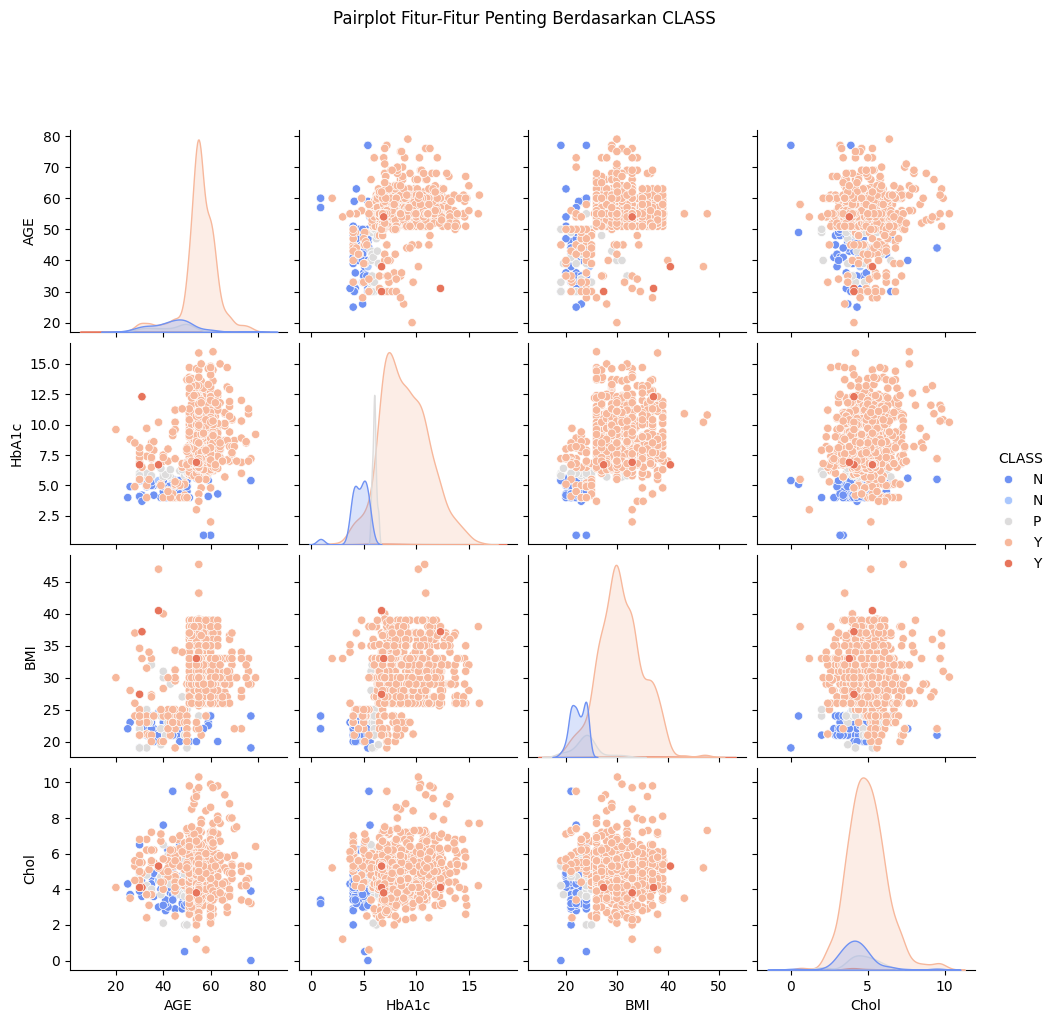

In [42]:
sns.pairplot(df, hue='CLASS', vars=['AGE', 'HbA1c', 'BMI', 'Chol'], palette='coolwarm', diag_kind='kde')
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.suptitle("Pairplot Fitur-Fitur Penting Berdasarkan CLASS", y=1.02)
plt.show()
# Tujuan: Visualisasi hubungan antar fitur penting dengan target CLASS. Apakah ada pola yang jelas antara fitur dan kelas?
# chol = kolesterol, HbA1c = hemoglobin A1c, BMI = Body Mass Index

#### PreProcessing Data
Pengelohan data sebelum digunakan

In [43]:
# Cek dan hapus duplikat
print("Jumlah duplikat sebelum dibersihkan:", df.duplicated().sum())
# 1.2. Drop duplikat
df = df.drop_duplicates()
print("Jumlah data setelah Menghapus Duplikat :", df.shape)

Jumlah duplikat sebelum dibersihkan: 0
Jumlah data setelah Menghapus Duplikat : (1000, 14)


In [44]:
# #Jumlah Data Outlier
# print("Jumlah data sebelum menghapus outlier:", df.shape)
# # 1.3. Hapus outlier sederhana dengan IQR pada tiap kolom numerik
# num_cols = df.select_dtypes(include=["int64","float64"]).columns
# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
#     df = df[(df[col] >= lower) & (df[col] <= upper)]

# print("Jumlah data setelah menghapus outlier:", df.shape)


Hapus Duplikat - Berikan batas akhir dan awal untuk data yang tidak normal - Memisahkan sebuah fitur dan target (class)

#### Pemberian Label agar lebih rapi

In [45]:
# Normalisasi label CLASS
df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()

# Tampilkan distribusi kelas setelah normalisasi
print("Distribusi kelas setelah normalisasi label:")
print(df['CLASS'].value_counts())


Distribusi kelas setelah normalisasi label:
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


#### Pisahkan Fitur dan Target
setelahnya lakukan split data yang sebagian data bernilai 20%  untuk menguji dan 80 % untuk belajar

In [46]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode kolom 'Gender' menjadi angka
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Misal 'F' -> 0, 'M' -> 1
# tujuan mengubah menjadi angka adalah untuk memudahkan pemrosesan data numerik

Kalau jumlah kelasnya tidak seimbang (misal terlalu banyak "YA" dibanding "TIDAK"),
SMOTE bantu menambah data palsu yang mirip aslinya biar adil jumlahnya.

Karena kalau satu kelas jauh lebih banyak dari yang lain, model bisa belajar hal yang salah.

### Cek Keseimbangan Kelas Target

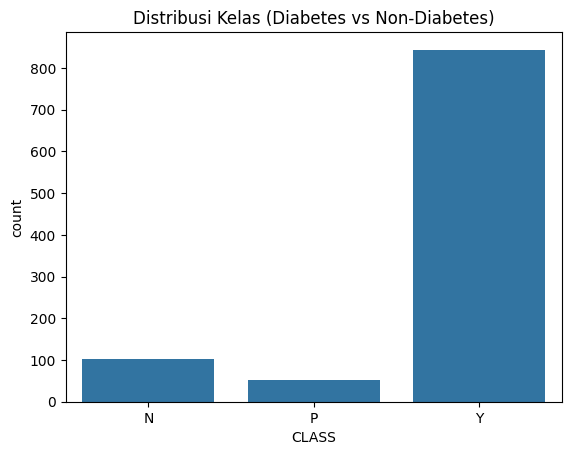

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLASS', data=df)
plt.title("Distribusi Kelas (Diabetes vs Non-Diabetes)")
plt.show()

#Tujuan: Apakah data target CLASS (N vs P) seimbang? Jika tidak, bisa pertimbangkan teknik resampling (SMOTE/ROS).


### Encode kolom 'CLASS' menjadi angka

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Salin data
df_model = df.copy()
print("Jumlah data sebelum encoding:", df_model.shape)


# Hapus label dengan jumlah terlalu sedikit
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()
print("Jumlah data setelah menghapus label dengan jumlah terlalu sedikit:", df_model.shape)


# Encode CLASS (multiclass)
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])
print("Label CLASS setelah encoding:", df_model['CLASS'].unique())
# Encode kolom-kolom kategorikal lainnya jika ada


# Drop kolom lain jika masih ada
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')
print("Jumlah data setelah drop kolom ID dan No_Pation:", df_model.shape)


Jumlah data sebelum encoding: (1000, 14)
Jumlah data setelah menghapus label dengan jumlah terlalu sedikit: (1000, 14)
Label CLASS setelah encoding: [0 1 2]
Jumlah data setelah drop kolom ID dan No_Pation: (1000, 12)


### Normalisai dan Split Data

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Pisahkan fitur dan target
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']
print("Jumlah fitur:", X.shape[1])
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Contoh data setelah normalisasi:\n", X_scaled[:5])
print("Jumlah data setelah normalisasi:", X_scaled.shape)
# Tujuan: Memastikan data sudah siap untuk model. Apakah ada fitur yang perlu dihapus atau dinormalisasi?
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah fitur: 11
Contoh data setelah normalisasi:
 [[-1.13968756 -0.40114429 -0.14478078 -0.38267195 -1.3349833  -0.50943577
  -1.03508433  1.81075636 -1.08545731 -0.369958   -1.12462205]
 [ 0.87034341 -3.13001704 -0.21295413 -0.11580401 -1.3349833  -0.89372998
  -0.67806268 -0.1586921  -0.4573978  -0.34264878 -1.32623876]
 [-1.13968756 -0.40114429 -0.14478078 -0.38267195 -1.3349833  -0.50943577
  -1.03508433  1.81075636 -1.08545731 -0.369958   -1.12462205]
 [-1.13968756 -0.40114429 -0.14478078 -0.38267195 -1.3349833  -0.50943577
  -1.03508433  1.81075636 -1.08545731 -0.369958   -1.12462205]
 [ 0.87034341 -2.33409582  0.67329948 -0.38267195 -1.3349833   0.02857612
  -0.96368    -0.6131802  -0.54712059 -0.39726722 -1.72947219]]
Jumlah data setelah normalisasi: (1000, 11)
Jumlah data latih: 800
Jumlah data uji: 200


## PENGEMBANGAN MODEL MACHINE LEARNING

In [50]:
# Tampilkan distribusi kelas target
print("Distribusi kelas target:")
print(y.value_counts())


Distribusi kelas target:
CLASS
2    844
0    103
1     53
Name: count, dtype: int64


### Preprocessing (Encode & Scaling)

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_smote))


Distribusi sebelum SMOTE: Counter({2: 675, 0: 82, 1: 43})
Distribusi setelah SMOTE: Counter({2: 675, 0: 675, 1: 675})


### Visualisasi distribusi kelas setelah SMOTE

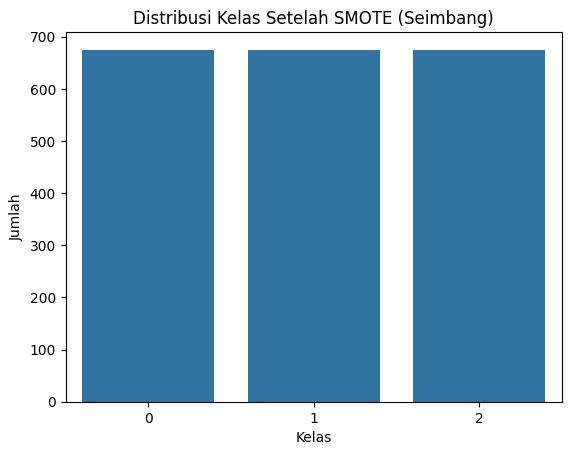

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame baru dari hasil SMOTE
df_smote = pd.DataFrame({'CLASS': y_train_smote})

# Visualisasi distribusi kelas setelah SMOTE
sns.countplot(x='CLASS', data=df_smote)
plt.title("Distribusi Kelas Setelah SMOTE (Seimbang)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()


### Preprocessing Data untuk Klasifikasi Multiclass

Dokumen ini menjelaskan tahapan preprocessing yang dilakukan dalam proyek klasifikasi penyakit diabetes menggunakan algoritma seperti XGBoost dan MLPClassifier. Dataset awal mengandung label `CLASS` dan beberapa fitur medis seperti `AGE`, `HbA1c`, dan `BMI`.
### 1. Salin Data
```python
df_model = df.copy()
```
Menyalin dataframe asli untuk menjaga data mentah tetap utuh.


### 2. Buang Kelas yang Terlalu Sedikit
```python
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()
```
Kelas dengan jumlah <2 dibuang karena `train_test_split(stratify=...)` membutuhkan minimal 2 sampel per kelas.


### 3. Encode CLASS (Multiclass)
```python
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])
```
Label `CLASS` diubah dari string menjadi angka seperti `0`, `1`, `2`


### 4. Encode Gender
```python
df_model['Gender'] = LabelEncoder().fit_transform(df_model['Gender'])
```
Kolom `Gender` dikonversi ke angka: `'F'` → 0, `'M'` → 1.


### 5. Hapus Kolom Tidak Relevan
```python
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')
```
Kolom identitas dihapus karena tidak berkontribusi dalam prediksi.


### 6. Pisahkan Fitur dan Target
```python
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']
```
- `X`: Fitur yang digunakan untuk pelatihan
- `y`: Label target yang ingin diprediksi


### 7. Normalisasi Fitur
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Fitur dinormalisasi agar berada dalam skala yang sama, menghindari dominasi fitur berskala besar.


### 8. Split Data: Train & Test
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
```
- Data dibagi 80% untuk pelatihan, 20% untuk pengujian
- `stratify=y` menjaga proporsi label tetap seimbang
- `random_state=42` memastikan hasil dapat direproduksi



In [53]:
# Encode kolom 'CLASS' menjadi angka
le = LabelEncoder()
y_train_smote = le.fit_transform(y_train_smote)
y_test = le.transform(y_test)
# Tujuan: Memastikan label target sudah dalam format numerik untuk model.
# Cek distribusi kelas target
print("Distribusi kelas target setelah encoding:")
print(pd.Series(y_train_smote).value_counts())  

Distribusi kelas target setelah encoding:
2    675
0    675
1    675
Name: count, dtype: int64


#### Hyperparameter Tuning Manual untuk XGboost

In [54]:
best_score = 0
best_params = {}

for n in [50, 100]:
    for depth in [3, 5]:
        for lr in [0.01, 0.1]:
            model = XGBClassifier(n_estimators=n, max_depth=depth, learning_rate=lr,
                                  use_label_encoder=False, eval_metric='logloss', random_state=42)
            model.fit(X_train_smote, y_train_smote)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            print("Accuracy on real test set:", acc)
            print(f"Params: n_estimators={n}, max_depth={depth}, learning_rate={lr} → acc={acc}")
            if acc > best_score:
                best_score = acc
                best_params = {'n_estimators': n, 'max_depth': depth, 'learning_rate': lr}

print("Best Params:", best_params)


Accuracy on real test set: 0.99
Params: n_estimators=50, max_depth=3, learning_rate=0.01 → acc=0.99
Accuracy on real test set: 0.985
Params: n_estimators=50, max_depth=3, learning_rate=0.1 → acc=0.985
Accuracy on real test set: 1.0
Params: n_estimators=50, max_depth=5, learning_rate=0.01 → acc=1.0
Accuracy on real test set: 0.995
Params: n_estimators=50, max_depth=5, learning_rate=0.1 → acc=0.995
Accuracy on real test set: 0.985
Params: n_estimators=100, max_depth=3, learning_rate=0.01 → acc=0.985
Accuracy on real test set: 0.99
Params: n_estimators=100, max_depth=3, learning_rate=0.1 → acc=0.99
Accuracy on real test set: 1.0
Params: n_estimators=100, max_depth=5, learning_rate=0.01 → acc=1.0
Accuracy on real test set: 0.99
Params: n_estimators=100, max_depth=5, learning_rate=0.1 → acc=0.99
Best Params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01}


- n_estimators=n : berapa banyak pohon keuputsan yang digunakan
- max depth : seberapa dalam pohonnya
- learning rate : seberapa cepat model belajar

gunanya : 
1. mencari semua kombinasi
2. melatih dengan data latihan
3. uji 
4. mencatat sebrapa bagus prediksnya
5. kalau ada yang lebih bagus dari sebelumnya maka dia yang akan dipakai

dilakukan secara manual . klo tidak manual dia make GridSearchCV

###  Model 1: XGBoost Classifier

xgboost = extreme gradient boosting dipakai untuk prediksi klasifikasi dan regresi , next generatioan dari, algoritma mL yang paling kuat dan cepat

💡 Kenapa XGBoost Populer?
Karena:

✅ Akurat – sering menang kompetisi data science.

⚡ Cepat – lebih cepat dari banyak algoritma lain.

🎯 Pintar – menggunakan banyak "pohon keputusan" yang saling bantu untuk memperbaiki kesalahan.

🔧 Fleksibel – bisa dipakai untuk banyak tipe data dan masalah.

🛠️ Mendukung tuning parameter – cocok untuk dicoba-coba agar akurasi makin tinggi.



In [55]:
from xgboost import XGBClassifier

# Model XGBoost dengan parameter yang sudah dituning
xgb_model = XGBClassifier(
    n_estimators=50,          # Dari tuning Anda
    max_depth=3,              # Lebih dangkal, juga salah satu best_params dari tuning
    learning_rate=0.1,        # Dari tuning Anda
    subsample=0.8,            # Menggunakan 80% data untuk tiap pohon
    colsample_bytree=0.8,     # Menggunakan 80% fitur untuk tiap pohon
    gamma=0.1,                # Regularisasi, nilai awal bisa 0, coba tingkatkan
    reg_alpha=0.01,           # L1 Regularization
    reg_lambda=0.01,          # L2 Regularization
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Training model pada data hasil SMOTE (X_train_smote, y_train_smote dari sel 1218fedd)
xgb_model.fit(X_train_smote, y_train_smote)

# Prediksi
xgb_preds = xgb_model.predict(X_test) # X_test dari sel 8e3820df
# xgb_probs_less_overfit = xgb_model_less_overfit.predict_proba(X_test)[:, 1] # jika dibutuhkan



Membangun model klasifikasi berbasis ensemble gradient boosting, yang sangat kuat dalam mendeteksi pola kompleks dan cocok untuk data tabular, bahkan saat ada missing value atau outlier.

dengan pemahaman kode yang saya pahami : 
- XGBClassifier(...) : ntuk membuat model XGBoost untuk klasfikasi
- Use_label itu agar selalu up to date
- eval_metric = penggunaan log loss untuk evaluasi multiclass
- randomstate = membuat hasil konsisten
- fit x dan y = pelatihan nya
- predik = predik
- predic proba = penghasilkan probabilitas yang diklasifikan menjadi kelas 1

* Log Loss mengukur seberapa jauh prediksi probabilitas dari kenyataan.
Semakin kecil nilai log loss, semakin baik prediksi model.

#### Hasil Evaluasi Model 

In [56]:

# Evaluasi
print("--- XGBoost (Less Overfit Parameters) Performance ---")
# Akurasi Training
xgb_train_preds_lo = xgb_model.predict(X_train_smote)
xgb_train_acc_lo = accuracy_score(y_train_smote, xgb_train_preds_lo)
print(f"XGBoost Training Accuracy: {xgb_train_acc_lo}")

# Akurasi Test
xgb_test_acc_lo = accuracy_score(y_test, xgb_preds) # y_test dari sel 8e3820df
print(f"XGBoost Test Accuracy: {xgb_test_acc_lo}")
print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
# Simpan hasil tuning XGBoost
xgb_results = []



--- XGBoost (Less Overfit Parameters) Performance ---
XGBoost Training Accuracy: 0.997037037037037
XGBoost Test Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.99       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.99      0.99      0.99       200

[[ 21   0   0]
 [  0   9   1]
 [  1   0 168]]


- precision : berapa banyak yang benar
- recall : berapa yang berhasil ditemukan oleh model
- f1-score : rata rata gabungan antara precision dan recal
- support : jumlah data asli 
- accuracy : presentasi tebakan dari model 

### Model 2: MLP Classifier

In [57]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# Definisikan pipeline
pipeline_mlp_cv = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10))
])

# Definisikan grid parameter yang akan diuji
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (30,), (50,30), (100,)],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__learning_rate_init': [0.001, 0.0001]
}

# Inisialisasi GridSearchCV
# Gunakan X dan y SEBELUM scaling dan SMOTE awal (misalnya X_original_for_cv, y_original_for_cv)
grid_search_mlp = GridSearchCV(pipeline_mlp_cv, param_grid_mlp, cv=5, scoring='accuracy', verbose=1)
grid_search_mlp.fit(X_train, y_train) # Gunakan data original (pra-split, pra-scale)

print("Best parameters found by GridSearchCV for MLP:")
print(grid_search_mlp.best_params_)
print(f"Best CV score for MLP: {grid_search_mlp.best_score_}")

# Anda kemudian bisa menggunakan grid_search_mlp.best_estimator_ sebagai model final Anda
# mlp_model_less_overfit = grid_search_mlp.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV for MLP:
{'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 30), 'mlp__learning_rate_init': 0.001}
Best CV score for MLP: 0.9087500000000001


MLP (Multilayer Perceptron) adalah salah satu jenis dari jaringan saraf tiruan (artificial neural network) yang dipakai dalam machine learning untuk menebak, mengklasifikasikan, atau memprediksi sesuatu berdasarkan data.

- input 
- hidden
- output


In [58]:
# 4. Model terbaik dari GridSearchCV menjadi mlp_model
# GridSearchCV secara otomatis melatih ulang model terbaik pada seluruh data training (X_train_smote, y_train_smote)
mlp_model_less_overfit = grid_search_mlp.best_estimator_

# --- Bagian Evaluasi (Sama seperti yang Anda miliki sebelumnya) ---
# Prediksi
# xgb_preds sudah dihitung menggunakan X_test dari sel 8e3820df
mlp_preds = mlp_model_less_overfit.predict(X_test)
# mlp_probs_less_overfit = mlp_model_less_overfit.predict_proba(X_test)[:, 1] # jika dibutuhkan

print("\n--- MLPClassifier (Hasil Tuning dengan GridSearchCV) Performance ---")
# Akurasi Training
# Dihitung pada data yang sama yang digunakan untuk fit/refit GridSearchCV
mlp_train_preds_lo = mlp_model_less_overfit.predict(X_train_smote)
mlp_train_acc_lo = accuracy_score(y_train_smote, mlp_train_preds_lo)
print(f"MLP (Tuned) Training Accuracy: {mlp_train_acc_lo}")

# Akurasi Test
mlp_test_acc_lo = accuracy_score(y_test, mlp_preds)
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, mlp_preds, zero_division=0))
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, mlp_preds))


--- MLPClassifier (Hasil Tuning dengan GridSearchCV) Performance ---
MLP (Tuned) Training Accuracy: 0.9733333333333334
MLP (Tuned) Test Accuracy: 0.945

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.53      0.80      0.64        10
           2       0.99      0.96      0.98       169

    accuracy                           0.94       200
   macro avg       0.79      0.87      0.83       200
weighted avg       0.96      0.94      0.95       200


Confusion Matrix (Test Data):
[[ 18   2   1]
 [  2   8   0]
 [  1   5 163]]


Membangun model klasifikasi berbasis neural network yang mampu mempelajari hubungan non-linear antar fitur, cocok untuk data numerik yang telah dinormalisasi (StandardScaler sangat penting di sini).

Dengan pemahaman kode model  :
- mlpclasifika = klasfikasi
- hidden layer = pembuatan hidden layer (100 neuron)
- max_iter =  melakukan iterasi training hingga 300 x
- random state = membuat hasil konsisten
- fit x & y = pelatihan
- predic dan predicproba = sama aja penjelasannya

#### Perbandingan MODEL TERBAIK

In [59]:
#Perbandingan Akurasi
print("\n--- Perbandingan Akurasi Model ---")  
print(f"XGBoost Test Accuracy: {xgb_test_acc_lo}")
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo}")
# Simpan hasil tuning MLP
mlp_results = {
    'model': 'MLPClassifier',
    'best_params': grid_search_mlp.best_params_,
    'train_accuracy': mlp_train_acc_lo,
    'test_accuracy': mlp_test_acc_lo
}
# Simpan hasil tuning XGBoost dan MLP ke dalam list
results = []
results.append({
    'model': 'XGBoost',
    'best_params': best_params,
    'train_accuracy': xgb_train_acc_lo,
    'test_accuracy': xgb_test_acc_lo
})
results.append(mlp_results)
# Tampilkan hasil tuning
results_df = pd.DataFrame(results)
print("\n--- Hasil Tuning Model ---")
print(results_df)


--- Perbandingan Akurasi Model ---
XGBoost Test Accuracy: 0.99
MLP (Tuned) Test Accuracy: 0.945

--- Hasil Tuning Model ---
           model                                        best_params  \
0        XGBoost  {'n_estimators': 50, 'max_depth': 5, 'learning...   
1  MLPClassifier  {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes...   

   train_accuracy  test_accuracy  
0        0.997037          0.990  
1        0.973333          0.945  


## Visualisasi Hasil Evaluasi

### Visualisasi Confusion Matrix

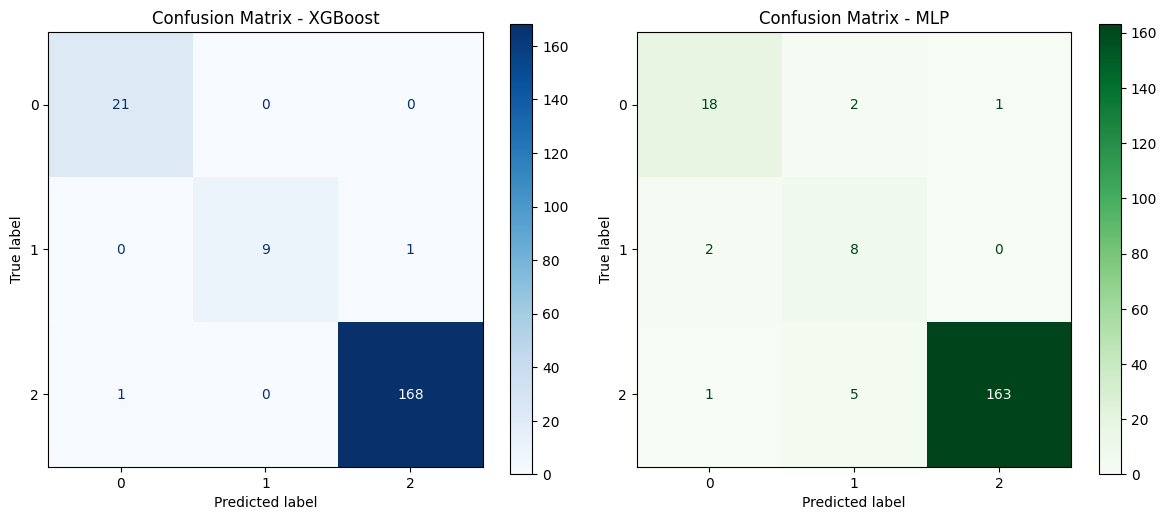

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_preds, ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - XGBoost")

ConfusionMatrixDisplay.from_predictions(
    y_test, mlp_preds, ax=axes[1], cmap='Greens')
axes[1].set_title("Confusion Matrix - MLP")

plt.tight_layout()
plt.show()


CM = tabel hasil tebakan vs jawaban aslinya 

Bagian-bagian dalam Confusion Matrix
Tiap kotak menunjukkan:
- Baris = label asli
- Kolom = label tebakan/model

Misalnya:
- Baris 0 Kolom 0: berapa banyak data kelas 0 yang berhasil ditebak sebagai 0 (tebakan benar)
- Baris 1 Kolom 2: berapa banyak data kelas 1 yang salah ditebak sebagai 2


### Perbandingan Akurasi dalam Bar Chart

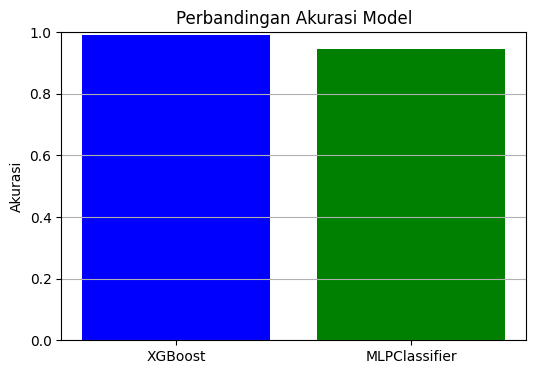

--- Hasil Akhir ---
XGBoost Test Accuracy: 0.9900
MLP (Tuned) Test Accuracy: 0.9450


In [61]:
import numpy as np

# Akurasi masing-masing model
acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['XGBoost', 'MLPClassifier'], [acc_xgb, acc_mlp], color=['blue', 'green'])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Menanmpilkan hasil akhir
print("--- Hasil Akhir ---")
print(f"XGBoost Test Accuracy: {xgb_test_acc_lo:.4f}")
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo:.4f}")

# SELESAI

### SET RANDOM SEET KEMBALI

In [62]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)


#### Memastikan Random State konsisten

In [63]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)


### Penyimpanan Model Ke .PKL

In [64]:
import joblib

# Simpan model XGBoost dan MLP
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')


['mlp_model.pkl']

### TUJUAN PKL 
1. Melatih model butuh waktu dan respurce , jadi stelah dilatih , dismpan saja model nya tujuan agar tidak perlu training ulang 
2. bisa digunakan kapan saja

untuk membuka kembali :

model = joblib.load('xgb_model.pkl')

prediksi = model.predict(data_baru)

### Simpan Evaluasi ke CSV

In [65]:
from sklearn.metrics import accuracy_score

acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)


In [66]:
# Simpan hasil evaluasi ke file CSV
evaluation_df = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})

evaluation_df.to_csv("model_evaluation.csv", index=False)
print("Hasil evaluasi disimpan ke model_evaluation.csv")


Hasil evaluasi disimpan ke model_evaluation.csv


#### nilai keluaran tanpa disimpan

In [67]:
# Save models
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')

# Save evaluation
evaluation_results = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})
evaluation_results.to_csv('model_evaluation.csv', index=False)
evaluation_results

,Model,Accuracy
0,XGBoost,0.990
1,MLPClassifier,0.945
